In [1]:
import os
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from utils import *
from matplotlib.patches import Patch
from scipy import stats
from collections import OrderedDict
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.family']='Arial'
plt.rcParams['font.sans-serif']='Arial'

## Figure 02

In [2]:
## Fishries data(1985-2020)
nianjian = pd.read_csv('./data/Fisheries_CHN.csv')
nianjian = nianjian[nianjian.Year >= 1985]
spe_list = nianjian.columns

JSM_pop = pd.read_csv('./data/Output_Ep20/JSM_pop.csv')
JA_pop = pd.read_csv('./data/Output_Ep20/JA_pop.csv')
PCM_pop = pd.read_csv('./data/Output_Ep20/PCM_pop.csv')
SYC_pop = pd.read_csv('./data/Output_Ep20/SYC_pop.csv')
LH_pop = pd.read_csv('./data/Output_Ep20/LH_pop.csv')
BS_pop = pd.read_csv('./data/Output_Ep20/BS_pop.csv')

Sim_years = 300
Age_ = [10, 4, 8, 6, 7, 9]
Fish_pop_list = [JSM_pop, JA_pop, PCM_pop, SYC_pop, LH_pop, BS_pop]
Finput_color_list = ['darkred', 'k']
fontsize = 16
ylim_list = [()]
Alphbeta1 = ['a', 'b', 'c', 'd', 'e', 'f']
Alphbeta2 = [ 'g', 'h', 'i', 'j','k', 'l']
Alphbeta3 = [ 'm', 'n', 'o', 'p','q', 'r']

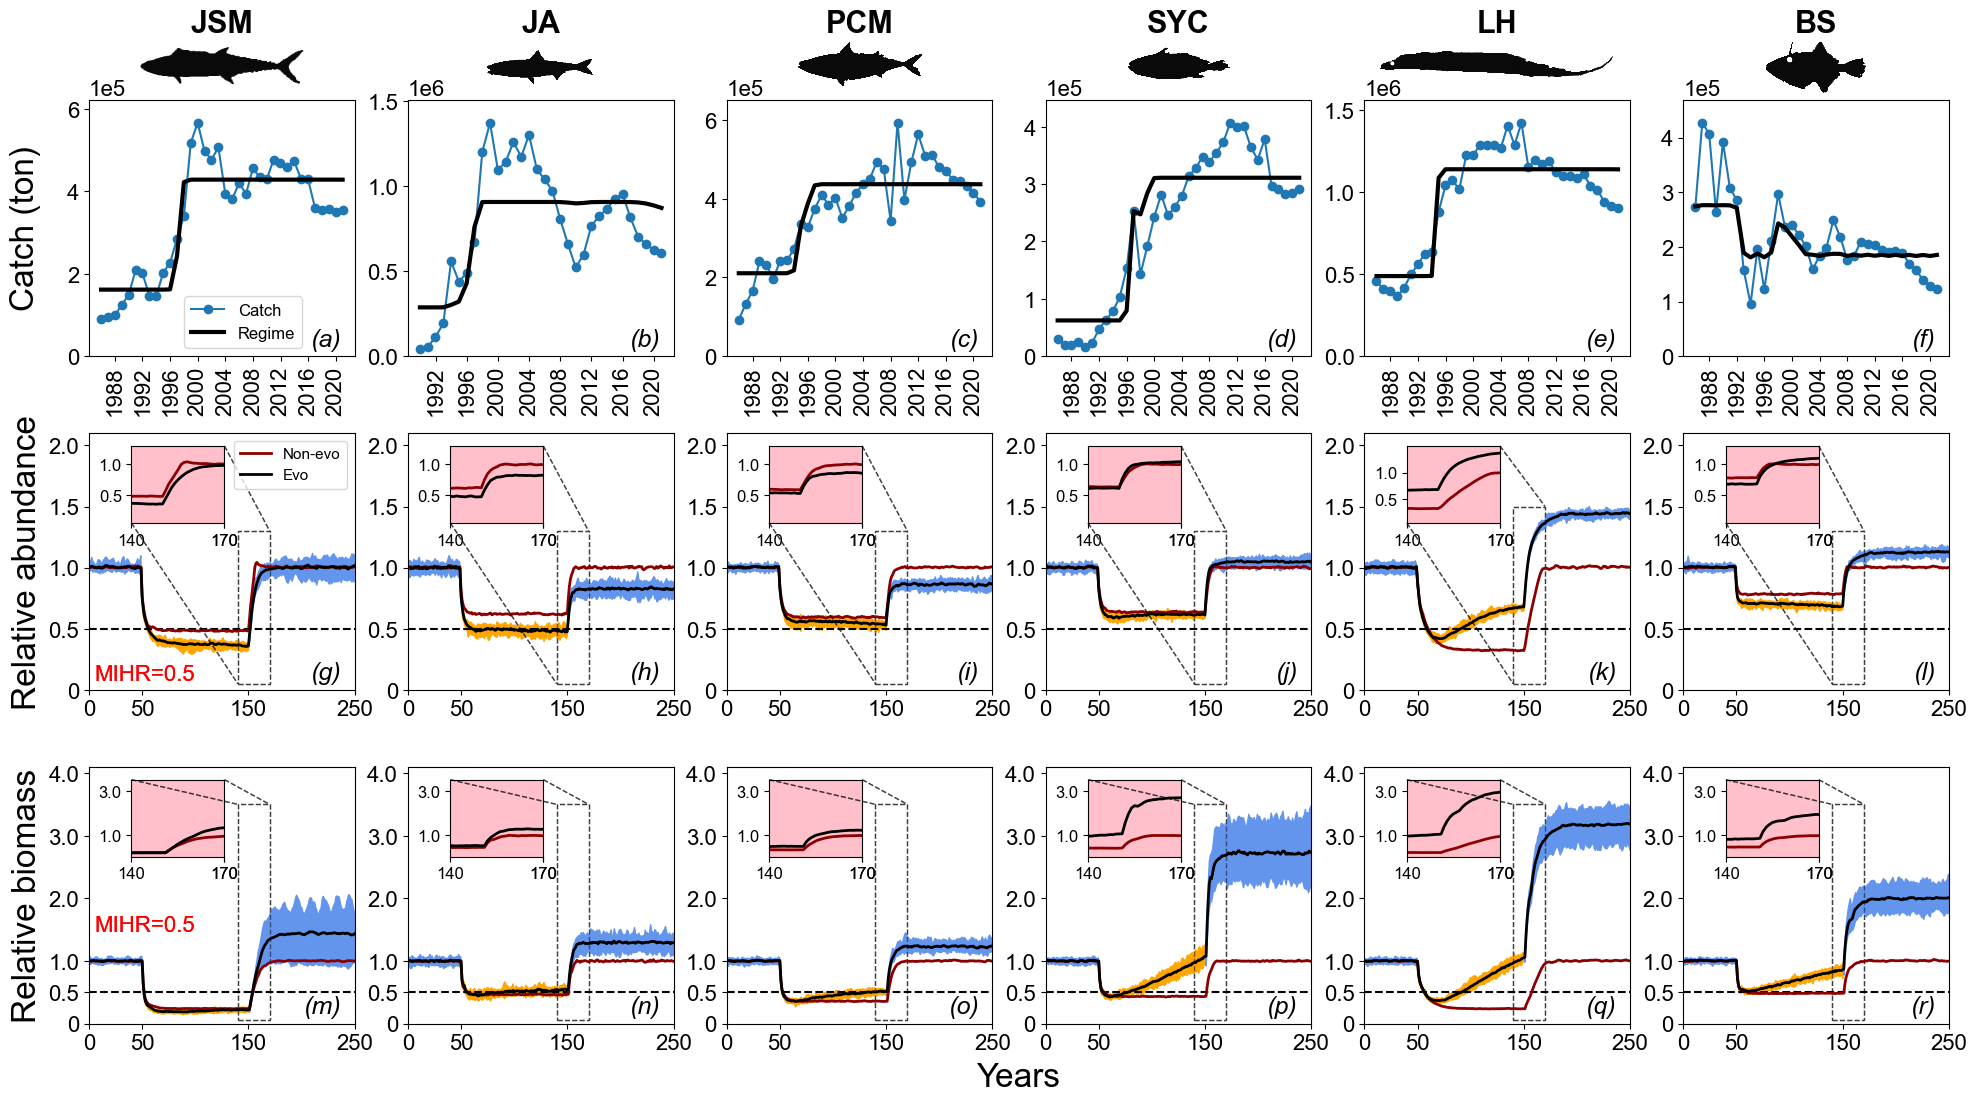

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.ticker import FormatStrFormatter

LogoPath = ['JSM.png', 'JA.png', 'PCM.png', 'SYC.png', 'LH.png', 'BS.png']
ZoomScale = [0.2, 0.3, 0.15, 0.12, 0.28, 0.12]

fig, ax = plt.subplots(3, 6, figsize=(24,12), gridspec_kw={'hspace':0.3})
for spe_idx, Fish_species in enumerate(Fish_pop_list):
    Fish_species_f05 = Fish_species[Fish_species['Finput']==0.5]
    df_min, df_mean, df_max = QuantBond(Fish_species_f05)
    for irow in np.arange(3):
        if irow == 0:     
            # insert fish pic
            logo_path = './data/Fish_img/'+LogoPath[spe_idx]  
            logo_image = plt.imread(logo_path)
            imagebox = OffsetImage(logo_image, zoom=ZoomScale[spe_idx])
            ab = AnnotationBbox(imagebox, (0.5, 1.13), xycoords='axes fraction', frameon=False, pad=0.2)
            ax[irow, spe_idx].add_artist(ab)
            
            spe_name = nianjian.columns[spe_idx+3]
            spe = pd.Series(np.array(nianjian[spe_name]), index=pd.date_range('1985', '2021', freq='Y'))

            if spe_name != 'BS':
                mod_spe= sm.tsa.MarkovRegression(spe.dropna(), k_regimes=2)
            else:
                mod_spe= sm.tsa.MarkovRegression(spe.dropna(), k_regimes=4)
            res_spe = mod_spe.fit()

            ax[irow, spe_idx].plot(spe, 'o-', label='Catch')
            ax[irow, spe_idx].plot(res_spe.fittedvalues, 'k-', lw=3, label='Regime')
            ax[irow, spe_idx].set_title(spe_name, fontsize=fontsize+6, fontweight='bold', y=1.23)
            ax[irow, spe_idx].set_ylim(0, np.max(spe)*1.1)
            ax[irow, spe_idx].tick_params(labelsize=fontsize)
            ax[irow, spe_idx].ticklabel_format(style='sci', scilimits=(-2, 2), axis='y')
            ax[irow, spe_idx].yaxis.get_offset_text().set_fontsize(fontsize)
            ax[irow, spe_idx].text(float(0.95), float(0.04), '('+ Alphbeta1[spe_idx]+')', transform=ax[irow, spe_idx].transAxes, 
                                   ha='right', fontsize=18, fontstyle='italic')
            
            for tick in ax[irow, spe_idx].get_xticklabels():
                tick.set_rotation(90)                
            if irow==0 and spe_idx==0:
                ax[irow, spe_idx].set_ylabel('Catch (ton)', fontsize=fontsize+8)
                ax[irow, spe_idx].yaxis.set_label_coords(-.18, .5)
                ax[irow, spe_idx].legend(loc='lower center', fontsize=10+2, bbox_to_anchor=(0.58, 0))
                       
        elif irow == 1:
            ax[irow, spe_idx].axhline(y=0.5, color='black', linestyle='--')
            ax[irow, spe_idx].set_xlim([50, 300])
            ax[irow, spe_idx].set_xticks([50, 100, 200, 300])
            ax[irow, spe_idx].set_xticklabels(['0','50','150','250'], fontsize=fontsize)
            ax[irow, spe_idx].set_ylim([0, 2.1])
            ax[irow, spe_idx].set_yticks([0, 0.5, 1.0, 1.5, 2.0])
            ax[irow, spe_idx].set_yticklabels(['0','0.5','1.0','1.5', '2.0'], fontsize=fontsize)
            ax[irow, spe_idx].text(float(0.95), float(0.04), '('+Alphbeta2[spe_idx]+')', transform=ax[irow, spe_idx].transAxes, 
                                   ha='right', fontsize=18, fontstyle='italic')
            axins = ax[irow, spe_idx].inset_axes((0.16, 0.65, 0.35, 0.3)) 
            for i1, j1 in enumerate(df_mean['CVg'].unique()):
                if spe_idx!=4:
                    window_head=1.3
                else:
                    window_head=1.5
                low_ = 50-Age_[spe_idx]-10
                upper_ = 100-Age_[spe_idx]
                ref_mean = df_mean[df_mean['CVg']==0].iloc[low_:upper_,:]['num_pop'].mean()

                if j1 > 0:
                    x_fill = np.linspace(Age_[spe_idx], 300, 300-Age_[spe_idx])
                    ymin_fill = df_min[df_min['CVg']==j1]['num_pop']
                    ymax_fill = df_max[df_max['CVg']==j1]['num_pop']
                    seg_col = ['cornflowerblue', 'orange', 'cornflowerblue']
                    seg_x= [x_fill[Age_[spe_idx]:(100-Age_[spe_idx])], x_fill[(100-Age_[spe_idx]):(200-Age_[spe_idx])],
                            x_fill[(200-Age_[spe_idx]):(300-Age_[spe_idx])]]
                    ymin_ref = ymin_fill/ref_mean
                    seg_ymin = [ymin_ref[Age_[spe_idx]:(100-Age_[spe_idx])], ymin_ref[(100-Age_[spe_idx]):(200-Age_[spe_idx])],
                                ymin_ref[(200-Age_[spe_idx]):(300-Age_[spe_idx])]]
                    ymax_ref = ymax_fill/ref_mean
                    seg_ymax = [ymax_ref[Age_[spe_idx]:(100-Age_[spe_idx])], ymax_ref[(100-Age_[spe_idx]):(200-Age_[spe_idx])],
                                ymax_ref[(200-Age_[spe_idx]):(300-Age_[spe_idx])]]          
                    for z in np.arange(3): 
                        ax[irow, spe_idx].fill_between(seg_x[z], seg_ymin[z], seg_ymax[z], color=seg_col[z])

                ax[irow, spe_idx].plot(np.arange(Sim_years)[Age_[spe_idx]:]+1, 
                                       df_mean[df_mean['CVg']==df_mean['CVg'].unique()[i1]]['num_pop']/ref_mean,
                                       label=str([f'Evo' if int(j1)==12 else f'Non-evo'][0]), color=Finput_color_list[i1], lw=2)
                
                if spe_idx == 0:
                    ax[irow, spe_idx].text(55, 0.08, 'MIHR=0.5', color='r', fontsize=fontsize)
                    ax[irow, spe_idx].xaxis.set_label_coords(*(3.5, -0.15))
                    if irow == 1:
                        handles, labels = plt.gca().get_legend_handles_labels()
                        by_label = OrderedDict(zip(labels, handles))
                        ax[irow, spe_idx].legend(fontsize=10+1)
                        ax[irow, spe_idx].set_ylabel('Relative abundance', fontsize=fontsize+8)
                        
                ax[irow, spe_idx].grid(False)
                axins.plot(np.arange(Sim_years)[Age_[spe_idx]:]+1, 
                           df_mean[df_mean['CVg']==df_mean['CVg'].unique()[i1]]['num_pop']/ref_mean,
                label = ['none-Evo' if j1==0 else 'Evo'][0],
                color = Finput_color_list[i1], lw=2)
                axins.set_xlim(190, 220)
                axins.set_xticks([190, 220, 220])
                axins.set_xticklabels(['140','150','170'], fontsize=fontsize-4)
                axins.set_ylim(0.05, window_head)
                axins.set_yticks([0.5,1.0])
                axins.set_yticklabels(['0.5','1.0'], fontsize=fontsize-4)
                axins.set_facecolor('pink')
                axins.grid(False)
                mark_inset(ax[irow, spe_idx], axins, loc1=3, loc2=1, fc="none", ec='k', lw=1, ls='--', alpha=0.5)
        else:
            ax[irow, spe_idx].axhline(y=0.5, color='black', linestyle='--')
            ax[irow, spe_idx].set_xlim([50, 300])
            ax[irow, spe_idx].set_xticks([50, 100, 200, 300])
            ax[irow, spe_idx].set_xticklabels(['0','50','150','250'], fontsize=fontsize)
            ax[irow, spe_idx].set_ylim([0, 4.1])
            ax[irow, spe_idx].set_yticks([0, 0.5, 1.0, 2.0, 3.0, 4.0])
            ax[irow, spe_idx].set_yticklabels(['0', '0.5', '1.0', '2.0', '3.0', '4.0'], fontsize=fontsize)
            ax[irow, spe_idx].text(float(0.95), float(0.04), '('+Alphbeta3[spe_idx]+')', transform=ax[irow, spe_idx].transAxes, 
                                   ha='right', fontsize=18, fontstyle='italic')
            axins = ax[irow, spe_idx].inset_axes((0.16, 0.65, 0.35, 0.3)) 
            for i1, j1 in enumerate(df_mean['CVg'].unique()):
                if spe_idx != 4:
                    window_head=1.3
                else:
                    window_head=1.5
                low_ = 50-Age_[spe_idx]-10
                upper_ = 100-Age_[spe_idx]
                ref_mean = df_mean[df_mean['CVg']==0].iloc[low_:upper_,:]['SumBiomass'].mean()

                if j1 > 0:
                    x_fill = np.linspace(Age_[spe_idx], 300, 300-Age_[spe_idx])
                    ymin_fill = df_min[df_min['CVg']==j1]['SumBiomass']
                    ymax_fill = df_max[df_max['CVg']==j1]['SumBiomass']
                    seg_col = ['cornflowerblue', 'orange', 'cornflowerblue']
                    seg_x = [x_fill[Age_[spe_idx]:(100-Age_[spe_idx])], x_fill[(100-Age_[spe_idx]):(200-Age_[spe_idx])],
                            x_fill[(200-Age_[spe_idx]):(300-Age_[spe_idx])]]
                    ymin_ref = ymin_fill/ref_mean
                    seg_ymin = [ymin_ref[Age_[spe_idx]:(100-Age_[spe_idx])], ymin_ref[(100-Age_[spe_idx]):(200-Age_[spe_idx])],
                                ymin_ref[(200-Age_[spe_idx]):(300-Age_[spe_idx])]]
                    ymax_ref = ymax_fill/ref_mean
                    seg_ymax = [ymax_ref[Age_[spe_idx]:(100-Age_[spe_idx])], ymax_ref[(100-Age_[spe_idx]):(200-Age_[spe_idx])],
                                ymax_ref[(200-Age_[spe_idx]):(300-Age_[spe_idx])]]          
                    for z in np.arange(3): 
                        ax[irow, spe_idx].fill_between(seg_x[z], seg_ymin[z], seg_ymax[z], color=seg_col[z])

                ax[irow, spe_idx].plot(np.arange(Sim_years)[Age_[spe_idx]:]+1, 
                                       df_mean[df_mean['CVg']==df_mean['CVg'].unique()[i1]]['SumBiomass']/ref_mean,
                                       color=Finput_color_list[i1], lw=2)
                
                if spe_idx == 0:
                    ax[irow, spe_idx].text(55, 1.48, 'MIHR=0.5', color='r', fontsize=fontsize)
                    ax[irow, spe_idx].set_xlabel('Years', fontsize=fontsize+8)
                    ax[irow, spe_idx].xaxis.set_label_coords(*(3.5, -0.15))
                    handles, labels = plt.gca().get_legend_handles_labels()
                    by_label = OrderedDict(zip(labels, handles))
                    ax[irow, spe_idx].set_ylabel('Relative biomass', fontsize=fontsize+8)
                        
                ax[irow, spe_idx].grid(False)
                axins.plot(np.arange(Sim_years)[Age_[spe_idx]:]+1, 
                           df_mean[df_mean['CVg']==df_mean['CVg'].unique()[i1]]['SumBiomass']/ref_mean,
                label = ['none-Evo' if j1==0 else 'Evo'][0],
                color = Finput_color_list[i1], lw=2)
                axins.set_xlim(190, 220)
                axins.set_xticks([190, 220, 220])
                axins.set_xticklabels(['140','150','170'], fontsize=fontsize-4)
                axins.set_ylim(0.05, 3.5)
                axins.set_yticks([1.0, 3.0])
                axins.set_yticklabels(['1.0', '3.0'], fontsize=fontsize-4)
                axins.set_facecolor('pink')
                axins.grid(False)
                mark_inset(ax[irow, spe_idx], axins, loc1=2, loc2=1, fc="none", ec='k', lw=1, ls='--', alpha=0.5)            
fig.tight_layout()

# plt.savefig('./figures/Figure_02_dpi300.jpg', dpi=300, bbox_inches='tight')
plt.savefig('./figures/Figure_02.pdf')

## Figure 03

In [4]:
Epochs = 20
biomass_data = pd.DataFrame()
for epo in np.arange(Epochs)+1:
    for spe_idx, Fish_species in enumerate(Fish_pop_list):
        Fish_spe = Fish_species[Fish_species.Epoch==epo]
        Finput_list = Fish_spe['Finput'].unique()
        CVg_list = Fish_spe['CVg'].unique()
        for i, j in enumerate(Finput_list):
            biomass_tmp = []
            for i1, j1 in enumerate(CVg_list):
                biomass_f = Fish_spe[(Fish_spe['Finput']==j)&(Fish_spe['CVg']==j1)]['SumBiomass'][110:160].mean()
                biomass_no_f = Fish_spe[(Fish_spe['Finput']==j)&(Fish_spe['CVg']==j1)]['SumBiomass'][230:].mean()
                biomass_tmp.append([biomass_f, biomass_no_f])
            biomass_f1 = biomass_tmp[1][0] / (biomass_tmp[0][0]+0.0001)
            biomass_f0 = biomass_tmp[1][1] / (biomass_tmp[0][1]+0.0001)
            ration_tmp = pd.DataFrame([[spe_idx, j, biomass_f1, biomass_f0, epo]],
                                      columns=['Spe_idx', 'Finput', 'Biomass_ratio_f1', 'Biomass_ratio_f0', 'Epoch'])
            biomass_data = pd.concat([biomass_data, ration_tmp], axis=0) 

biomass_data.head()

########################################################################################################

biomass_data1 = pd.DataFrame()
for epo in np.arange(Epochs)+1:
    for spe_idx, Fish_species in enumerate(Fish_pop_list):
        Fish_spe = Fish_species[Fish_species.Epoch==epo]
        Finput_list = Fish_spe['Finput'].unique()
        CVg_list = Fish_spe['CVg'].unique()
        low_ = 50-Age_[spe_idx]-20
        upper_ = 50-Age_[spe_idx] 
        for i, j in enumerate(Finput_list):
            biomass_tmp = []
            ref_evo = Fish_spe[(Fish_spe['Finput']==j)&(Fish_spe['CVg']==12)].iloc[low_:upper_,:]['SumBiomass'].mean() 
            ref_no_evo = Fish_spe[(Fish_spe['Finput']==j)&(Fish_spe['CVg']==0)].iloc[low_:upper_,:]['SumBiomass'].mean() 
            for i1, j1 in enumerate(CVg_list):
                biomass_no_f = Fish_spe[(Fish_spe['Finput']==j)&(Fish_spe['CVg']==j1)]['SumBiomass'][200:].mean()
                biomass_tmp.append(biomass_no_f)
            biomass_evo = biomass_tmp[1] / (ref_evo+0.01)
            biomass_no_evo = biomass_tmp[0] / (ref_no_evo+0.01)
            ration_tmp = pd.DataFrame([[spe_idx, j, biomass_evo, biomass_no_evo]],
                                      columns=['Spe_idx', 'Finput', 'Biomass_recov_evo', 'Biomass_recov_no_evo'])
            biomass_data1 = pd.concat([biomass_data1, ration_tmp], axis=0) 

biomass_data1.head()

,Spe_idx,Finput,Biomass_recov_evo,Biomass_recov_no_evo
0,0,0.2,1.738042,1.006462
0,0,0.5,1.315600,0.994415
0,0,0.8,0.591718,0.985411
0,1,0.2,1.331841,0.995736
0,1,0.5,1.291751,1.000755


In [5]:
alpha = 0.95
Spe_idx_list = np.arange(6)
Finputlist = [0.2, 0.5, 0.8]
biomass_sum = pd.DataFrame()

for spe_i in Spe_idx_list:
    for finput_i in Finputlist:
        Spe_f1 = np.array(biomass_data[(biomass_data.Spe_idx==spe_i)&(biomass_data.Finput==finput_i)]['Biomass_ratio_f1'])
        Spe_f0 = np.array(biomass_data[(biomass_data.Spe_idx==spe_i)&(biomass_data.Finput==finput_i)]['Biomass_ratio_f0'])

        Spe_f1_mean = np.mean(Spe_f1)
        Spe_f0_mean = np.mean(Spe_f0)

        df = len(Spe_f1) - 1
        Spe_f1_ci = stats.t.interval(alpha, df, loc=Spe_f1_mean, scale=stats.sem(Spe_f1)) 
        Spe_f1_se = Spe_f1_ci[1]-np.mean(Spe_f1_ci)
        Spe_f0_ci = stats.t.interval(alpha, df, loc=Spe_f0_mean, scale=stats.sem(Spe_f0)) 
        Spe_f0_se = Spe_f0_ci[1]-np.mean(Spe_f0_ci)
        
        df_tmp = pd.DataFrame([[spe_i, finput_i, Spe_f0_mean, Spe_f1_mean, Spe_f0_se, Spe_f1_se]],
                                columns=['Spe_idx', 'Finput', 'Biomass_ratio_f0', 'Biomass_ratio_f1', 'f0_se', 'f1_se'])
        biomass_sum = pd.concat([biomass_sum, df_tmp], axis=0)
biomass_sum.head()

##########################################################################################

alpha = 0.95
Spe_idx_list = np.arange(6)
Finputlist = [0.2, 0.5, 0.8]
biomass_sum1 = pd.DataFrame()

for spe_i in Spe_idx_list:
    for finput_i in Finputlist:
        Spe_evo = np.array(biomass_data1[(biomass_data1.Spe_idx==spe_i)&(biomass_data1.Finput==finput_i)]['Biomass_recov_evo'])
        Spe_noevo = np.array(biomass_data1[(biomass_data1.Spe_idx==spe_i)&(biomass_data1.Finput==finput_i)]['Biomass_recov_no_evo'])

        Spe_evo_mean = np.mean(Spe_evo)
        Spe_noevo_mean = np.mean(Spe_noevo)

        df = len(Spe_evo) - 1
        Spe_evo_ci = stats.t.interval(alpha, df, loc=Spe_evo_mean, scale=stats.sem(Spe_evo)) 
        Spe_evo_se = Spe_evo_ci[1]-np.mean(Spe_evo_ci)
        Spe_noevo_ci = stats.t.interval(alpha, df, loc=Spe_noevo_mean, scale=stats.sem(Spe_noevo)) 
        Spe_noevo_se = Spe_noevo_ci[1]-np.mean(Spe_noevo_ci)
        
        df_tmp = pd.DataFrame([[spe_i, finput_i, Spe_noevo_mean, Spe_evo_mean, Spe_noevo_se, Spe_evo_se]],
                                columns=['Spe_idx', 'Finput', 'Biomass_ratio_noevo', 'Biomass_ratio_evo', 'noevo_se', 'evo_se'])
        biomass_sum1 = pd.concat([biomass_sum1, df_tmp], axis=0)
biomass_sum1.head()

,Spe_idx,Finput,Biomass_ratio_noevo,Biomass_ratio_evo,noevo_se,evo_se
0,0,0.2,1.001105,1.765607,0.006249,0.031687
0,0,0.5,0.992357,1.409852,0.007542,0.114225
0,0,0.8,0.972334,0.711570,0.007994,0.107969
0,1,0.2,0.996159,1.306644,0.006895,0.027633
0,1,0.5,0.995036,1.284427,0.005110,0.037712


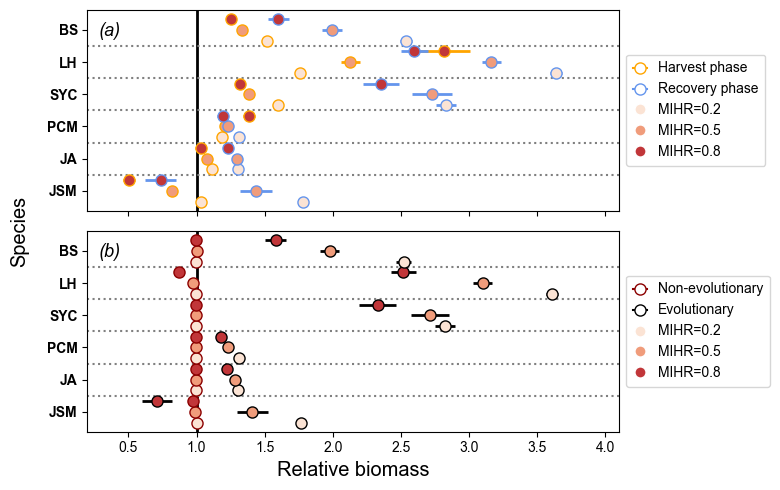

In [6]:
col = sns.color_palette('RdBu')[0:3]
col0 = col[0]
col1 = col[1]
col2 = col[2]

fig, ax = plt.subplots(2, 1, figsize=(8,5), sharex=True)
for i in np.arange(biomass_sum.shape[0]):
    x_f1 = biomass_sum['Biomass_ratio_f1'].iloc[i]
    x_f0 = biomass_sum['Biomass_ratio_f0'].iloc[i]
    if biomass_sum['Finput'].iloc[i] == 0.8:
        ax[0].errorbar(x_f1, i, lolims=False, xerr=biomass_sum['f1_se'].iloc[i], elinewidth=2, mec='orange', mew=1, 
                       fmt='o', ms=8, linestyle='', mfc=col0, color='orange', label='F=0.8') 
        ax[0].errorbar(x_f0, i, lolims=False, xerr=biomass_sum['f0_se'].iloc[i], elinewidth=2, mec='cornflowerblue', mew=1, 
                       fmt='o', ms=8, linestyle='', mfc=col0, color='cornflowerblue', label='')
    elif biomass_sum['Finput'].iloc[i] == 0.5:
        ax[0].errorbar(x_f1, i, lolims=False, xerr=biomass_sum['f1_se'].iloc[i], elinewidth=2, mec='orange', mew=1, 
                       fmt='o', ms=8, linestyle='', mfc=col1, color='orange', label='F=0.5') 
        ax[0].errorbar(x_f0, i, lolims=False, xerr=biomass_sum['f0_se'].iloc[i], elinewidth=2, mec='cornflowerblue', mew=1, 
                       fmt='o', ms=8, linestyle='', mfc= col1, color= 'cornflowerblue', label='')
    else:
        ax[0].errorbar(x_f1, i, lolims=False, xerr=biomass_sum['f1_se'].iloc[i], elinewidth=2, mec='orange', mew=1, 
                       fmt='o', ms=8, linestyle='', mfc= col2, color= 'orange', label='F=0.2') 
        ax[0].errorbar(x_f0, i, lolims=False, xerr=biomass_sum['f0_se'].iloc[i], elinewidth=2, mec='cornflowerblue', mew=1, 
                       fmt='o', ms=8, linestyle='', mfc= col2, color= 'cornflowerblue', label='')
    
ax[0].grid(False)
ax[0].set_xlim(0.2, 4.1)
ax[0].axvline(1.0, color='k', linestyle='-', lw=2)
for i in [2.5, 5.5, 8.5, 11.5, 14.5]:
    ax[0].axhline(i, color='grey', linestyle='dotted')
ax[0].set_yticks([1, 4, 7, 10, 13, 16])
ax[0].set_yticklabels(['JSM', 'JA', 'PCM', 'SYC', 'LH', 'BS'], fontsize=10, fontweight='bold')
ax[0].text(float(0.02), float(0.87), '(a)', transform=ax[0].transAxes, fontsize=13, fontstyle='italic')

# Legends
handles_f = [plt.Line2D([0], [0], marker='o', color='orange', label='Harvest phase', markerfacecolor='w', markersize=8),
             plt.Line2D([0], [0], marker='o', color='cornflowerblue', label='Recovery phase',  markerfacecolor='w', markersize=8),
             plt.Line2D([0], [0], marker='o', color='w', label='MIHR=0.2', markerfacecolor=col2, markersize=8),
             plt.Line2D([0], [0], marker='o', color='w', label='MIHR=0.5', markerfacecolor=col1, markersize=8),
             plt.Line2D([0], [0], marker='o', color='w', label='MIHR=0.8', markerfacecolor=col0, markersize=8)]
labels = ['Harvest phase', 'Recovery phase', 'MIHR=0.2', 'MIHR=0.5', 'MIHR=0.8']
ax[0].legend(handles_f, labels, loc='center left', bbox_to_anchor=(1, 0.5),
             handlelength=1, labelspacing=0.5, borderpad=0.5, fontsize=10)

###############################################################################################

for i in np.arange(biomass_sum1.shape[0]):
    x_noevo = biomass_sum1['Biomass_ratio_noevo'].iloc[i]
    x_evo = biomass_sum1['Biomass_ratio_evo'].iloc[i]
    if biomass_sum['Finput'].iloc[i] == 0.8:
        ax[1].errorbar(x_noevo, i, lolims=False, xerr=biomass_sum1['noevo_se'].iloc[i], elinewidth=2, mec='darkred', mew=1, 
                       fmt='o', ms=8, linestyle='', mfc=col0, color='darkred', label='F=0.8') 
        ax[1].errorbar(x_evo, i, lolims=False, xerr=biomass_sum1['evo_se'].iloc[i], elinewidth=2, mec='k', mew=1, 
                       fmt='o', ms=8, linestyle='', mfc= col0, color='k', label='F=0.8')
    elif biomass_sum['Finput'].iloc[i] == 0.5:
        ax[1].errorbar(x_noevo, i, lolims=False, xerr=biomass_sum1['noevo_se'].iloc[i], elinewidth=2, mec='darkred', mew=1, 
                       fmt='o', ms=8, linestyle='', mfc=col1, color='darkred', label='F=0.5')
        ax[1].errorbar(x_evo, i, lolims=False, xerr=biomass_sum1['evo_se'].iloc[i], elinewidth=2, mec='k', mew=1, 
                       fmt='o', ms=8, linestyle='', mfc=col1, color='k', label='F=0.5')
    else:
        ax[1].errorbar(x_noevo, i, lolims=False, xerr=biomass_sum1['noevo_se'].iloc[i], elinewidth=2, mec='darkred', mew=1, 
                       fmt='o', ms=8, linestyle='', mfc=col2, color='darkred', label='F=0.2')
        ax[1].errorbar(x_evo, i, lolims=False, xerr=biomass_sum1['evo_se'].iloc[i], elinewidth=2, mec='k', mew=1, 
                       fmt='o', ms=8, linestyle='', mfc=col2, color='k', label='F=0.2')
ax[1].grid(False)
ax[1].axvline(1.0, color='k', linestyle='-', lw=2)
for i in [2.5, 5.5, 8.5, 11.5, 14.5]:
    ax[1].axhline(i, color='grey', linestyle='dotted')
ax[1].set_yticks([1, 4, 7, 10, 13, 16])
ax[1].set_yticklabels(['JSM', 'JA', 'PCM', 'SYC', 'LH', 'BS'], fontsize=10, fontweight='bold')
ax[1].set_xlabel('Relative biomass', fontsize='x-large')
ax[1].set_ylabel('Species', fontsize='x-large')
ax[1].yaxis.set_label_coords(*(-0.11, 1.0))
ax[1].text(float(0.02), float(0.87), '(b)', transform=ax[1].transAxes, fontsize=13, fontstyle='italic')

# legends
handles_f = [plt.Line2D([1], [0], marker='o', color='darkred', label='Non-evolutionary', markerfacecolor='w', markersize=8),
             plt.Line2D([1], [0], marker='o', color='k', label='Evolutionary',  markerfacecolor='w', markersize=8),
             plt.Line2D([1], [0], marker='o', color='w', label='MIHR=0.2', markerfacecolor=col2, markersize=8),
             plt.Line2D([1], [0], marker='o', color='w', label='MIHR=0.5', markerfacecolor=col1, markersize=8),
             plt.Line2D([1], [0], marker='o', color='w', label='MIHR=0.8', markerfacecolor=col0, markersize=8)]
labels = ['Non-evolutionary', 'Evolutionary', 'MIHR=0.2', 'MIHR=0.5', 'MIHR=0.8']
ax[1].legend(handles_f, labels, loc='center left', bbox_to_anchor=(1, 0.5),
             handlelength=1, labelspacing=0.5, borderpad=0.5, fontsize=10)
plt.tight_layout()

# plt.savefig('./figures/Figure_03.jpg', dpi=600, bbox_inches='tight')
plt.savefig('./figures/Figure_03.pdf')

## Figure 04

In [7]:
# Augmented Dickey-Fuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

Fish_species_label = ['JSM', 'JA', 'PCM', 'SYC', 'LH', 'BS']
Epoch_list = JSM_pop.Epoch.unique()
Finput_list = JSM_pop.Finput.unique()
pop_p_df = pd.DataFrame(index=JSM_pop.Finput.unique())
mass_p_df = pd.DataFrame(index=JSM_pop.Finput.unique())
for spe_idx, spe in enumerate(Fish_pop_list):  
    pop_p_list = []
    mass_p_list = []
    for finput_idx, finput in enumerate(Finput_list):
        spe_pop = spe[(spe['Finput']==finput)&(spe['CVg']==12)]['num_pop'][(200-Age_[spe_idx]+10):]
        spe_mass = spe[(spe['Finput']==finput)&(spe['CVg']==12)]['SumBiomass'][(200-Age_[spe_idx]+10):]
        dftest_pop = adfuller(spe_pop, autolag='AIC')
        dftest_mass = adfuller(spe_mass, autolag='AIC')
        pvalue_pop = dftest_pop[1]
        pvalue_mass = dftest_mass[1]
        pop_p_list.append(pvalue_pop)
        mass_p_list.append(pvalue_mass)
    pop_p_df[Fish_species_label[spe_idx]] = pop_p_list
    mass_p_df[Fish_species_label[spe_idx]] = mass_p_list
    
pop_p_df
mass_p_df

,JSM,JA,PCM,SYC,LH,BS
0.2,7.885180e-09,8.530082e-12,1.694985e-13,4.725644e-07,2.287984e-08,6.315162e-08
0.5,9.243584e-10,2.441696e-10,9.057876e-11,4.454559e-08,5.888128e-08,1.916551e-08
0.8,1.685288e-09,2.873542e-09,1.539417e-10,2.421679e-08,9.804334e-08,2.017535e-08


In [8]:
cvg = 12
finput = 0.5
Epoch_list = JSM_pop.Epoch.unique()
t_pop_df = pd.DataFrame(index=JSM_pop.Epoch.unique())
t_mass_df = pd.DataFrame(index=JSM_pop.Epoch.unique())
pop_recov_df = pd.DataFrame(index=JSM_pop.Epoch.unique())
mass_recov_df = pd.DataFrame(index=JSM_pop.Epoch.unique())

for spe_idx, spe in enumerate(Fish_pop_list):  
    t_pop_list = []
    t_mass_list = []
    pop_recov_list = []
    mass_recov_list = []
    for epoch_idx, epoch in enumerate(Epoch_list):
        low_ = 50-10
        upper_ = 100-10
        ref_pop = spe[(spe['Epoch']==epoch)&(spe['Finput']==finput)&(spe['CVg']==0)].iloc[low_:upper_,:]['num_pop'].mean()
        ref_mass = spe[(spe['Epoch']==epoch)&(spe['Finput']==finput)&(spe['CVg']==0)].iloc[low_:upper_,:]['SumBiomass'].mean()    
        recov_pop_bar = spe[(spe['Epoch']==epoch)&(spe['Finput']==finput)&(spe['CVg']==cvg)]['num_pop'][200-10+10:].mean()
        recov_mass_bar = spe[(spe['Epoch']==epoch)&(spe['Finput']==finput)&(spe['CVg']==cvg)]['SumBiomass'][200-10+10:].mean()
        ratio_pop_level = recov_pop_bar/ref_pop
        ratio_mass_level = recov_mass_bar/ref_mass
        recov_pop = spe[(spe['Epoch']==epoch)&(spe['Finput']==finput)&(spe['CVg']==cvg)]['num_pop'][200-10:]
        recov_mass = spe[(spe['Epoch']==epoch)&(spe['Finput']==finput)&(spe['CVg']==cvg)]['SumBiomass'][200-10:]

        pop_recov_list.append(ratio_pop_level)
        mass_recov_list.append(ratio_mass_level)
        
        t_pop = 0
        ratio_pop = recov_pop.iloc[t_pop]/ref_pop
        while ratio_pop < ratio_pop_level:
            t_pop += 1
            ratio_pop = recov_pop.iloc[t_pop]/ref_pop
        t_pop_list.append(t_pop)
        
        t_mass = 0
        ratio_mass = recov_mass.iloc[t_mass]/ref_mass
        while ratio_mass < ratio_mass_level:
            t_mass += 1
            ratio_mass = recov_mass.iloc[t_mass]/ref_mass
        t_mass_list.append(t_mass)        
        
    t_pop_df[Fish_species_label[spe_idx]] = t_pop_list
    t_mass_df[Fish_species_label[spe_idx]] = t_mass_list
    pop_recov_df[Fish_species_label[spe_idx]] = pop_recov_list
    mass_recov_df[Fish_species_label[spe_idx]] = mass_recov_list
    
t_pop_df
t_mass_df
pop_recov_df
mass_recov_df.head()

,JSM,JA,PCM,SYC,LH,BS
1,1.294479,1.269138,1.239402,2.868314,2.985342,1.935477
2,1.276103,1.174753,1.181506,2.683668,2.991333,2.088949
3,1.656796,1.346264,1.191672,2.739143,3.207429,2.173488
4,1.601158,1.337052,1.328366,2.810970,3.153221,2.245399
5,1.231201,1.376940,1.232365,2.816020,2.899000,1.876029


In [9]:
## Pearson correlation coefficient
import scipy.stats as stats

pop_recov_t = np.array(t_pop_df.mean())
mass_recov_t = np.array(t_mass_df.mean())
l50 = [450, 50, 220, 140, 500, 300]
corr, p_value = stats.pearsonr(mass_recov_t, l50)
print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)


## Pelagic v.s. Demersal T-test
import scipy.stats as stats

pelagic = np.array(pd.concat([mass_recov_df.JSM, mass_recov_df.JA, mass_recov_df.PCM]))
demersal = np.array(pd.concat([mass_recov_df.SYC, mass_recov_df.LH, mass_recov_df.BS]))
t_statistic, p_value = stats.ttest_ind(pelagic, demersal)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Pearson correlation coefficient: 0.9123975874990684
p-value: 0.011175135555780563
t-statistic: -18.571729300188228
p-value: 8.026649138450867e-37


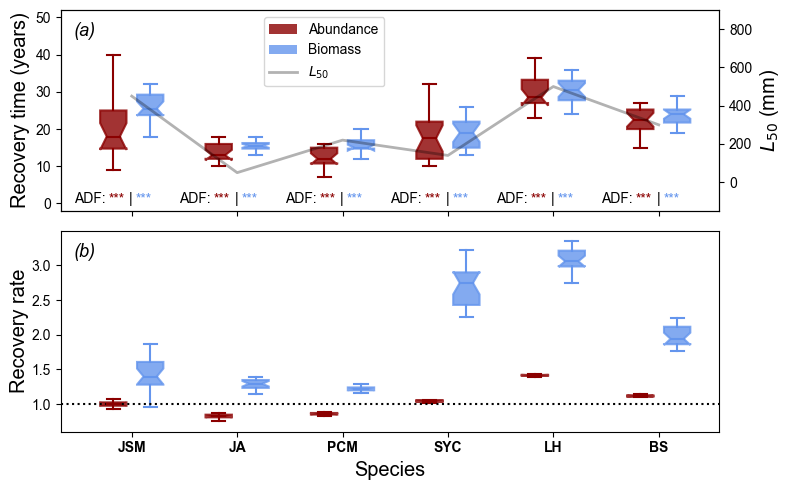

In [10]:
from matplotlib.lines import Line2D

pos_pop = np.linspace(1, 11, 6)
pos_mass = np.linspace(1, 11, 6)+0.7
c_pop = 'darkred'
c_mass = 'cornflowerblue'
alpha = 0.8

boxpropsA = dict(linestyle='-', linewidth=1.5, color=c_pop, facecolor=c_pop)
whiskerpropsA = dict(linewidth=1.5, color=c_pop)
cappropsA = dict(linewidth=1.5, color=c_pop)
medianpropsA = dict(linewidth=1.5, linestyle='-', color=c_pop)  # colors median line
boxpropsB = dict(linestyle='-', linewidth=1.5, color=c_mass, facecolor=c_mass)
whiskerpropsB = dict(linewidth=1.5, color=c_mass)
cappropsB = dict(linewidth=1.5, color=c_mass)
medianpropsB = dict(linewidth=1.5, linestyle='-', color=c_mass)  # colors median line

fig, ax = plt.subplots(2, 1, figsize=(8, 5), sharex=True)
popbox = ax[0].boxplot(t_pop_df, positions=pos_pop, patch_artist=True, 
                       notch=True, boxprops=boxpropsA, whiskerprops=whiskerpropsA, capprops=cappropsA, 
                       medianprops=medianpropsA, showmeans=False, showfliers=False)
for box in popbox['boxes']:
    box.set_facecolor(c_pop)
    box.set_alpha(alpha)        
massbox = ax[0].boxplot(t_mass_df, positions=pos_mass, patch_artist=True, 
                        notch=True, boxprops=boxpropsB, whiskerprops=whiskerpropsB, capprops=cappropsB, 
                        medianprops=medianpropsB, showmeans=False, showfliers=False)
for box in massbox['boxes']:
    box.set_facecolor(c_mass)
    box.set_alpha(alpha)  
 
ax[0].set_xlim(0, 12.5)
ax[0].set_ylim(-2, 52)
ax[0].set_ylabel('Recovery time (years)', fontsize='x-large')
legend_labels = ['Abundance', 'Biomass', r'$L_{50}$']
legend_patches = [Patch(facecolor=color, alpha=alpha) for color in [c_pop, c_mass]]
gray_line = Line2D([0], [0], color='k', alpha=0.3, lw=2)
legend_patches.append(gray_line)
ax[0].legend(legend_patches, legend_labels, loc='upper center', bbox_to_anchor=(0.4, 1.0))


ax1 = ax[0].twinx()
ax1.plot(0.5*(pos_pop+pos_mass), l50, color="k", alpha=0.3, lw=2)
ax1.spines['right'].set_color('k')
ax1.tick_params(axis='y', colors='k')
ax1.set_ylim(-150, 900)
ax1.set_ylabel(r'$L_{50}$ (mm)', fontsize='x-large')
ax1.set_xticks(0.5*(pos_pop+pos_mass))
ax1.set_xticklabels(t_pop_df.columns, fontsize=16, fontweight='bold')


str_piece = ['ADF: ', '***', '|', '***']
str_colors = ['k', c_pop, 'k', c_mass]
x_pos = 0.25
for i in pos_pop:
    for t, c in enumerate(str_colors):
        if i in pos_pop:
            ax[0].text(x_pos, 0, str_piece[t], color=c, fontsize=10)
        else:
            ax[0].text(x_pos, 0, str_piece[t], color=c, fontsize=10)
        x_pos += len(str_piece[t])*0.131
    x_pos += 0.43
ax[0].text(0.02, 0.87, '(a)', transform=ax[0].transAxes, fontsize=13, fontstyle='italic')

popbox_ = ax[1].boxplot(pop_recov_df, positions=pos_pop, patch_artist=True, 
                        notch=True, boxprops=boxpropsA, whiskerprops=whiskerpropsA, capprops=cappropsA, 
                        medianprops=medianpropsA, showmeans=False, showfliers=False)
for box in popbox_['boxes']:
    box.set_facecolor(c_pop)
    box.set_alpha(alpha)   
massbox_ = ax[1].boxplot(mass_recov_df, positions=pos_mass, patch_artist=True, 
                         notch=True, boxprops=boxpropsB, whiskerprops=whiskerpropsB, capprops=cappropsB, 
                         medianprops=medianpropsB, showmeans=False, showfliers=False)
for box in massbox_['boxes']:
    box.set_facecolor(c_mass)
    box.set_alpha(alpha)  

ax[1].axhline(1, color='k', linestyle='dotted')
ax[1].set_xticks(0.5*(pos_pop+pos_mass))
ax[1].set_xticklabels(t_pop_df.columns, fontsize=10, fontweight='bold')
ax[1].set_ylim(0.6, 3.5)
ax[1].set_xlabel('Species', fontsize='x-large')
ax[1].set_yticks([1.0, 1.5, 2.0, 2.5, 3.0], [1.0, 1.5, 2.0, 2.5, 3.0], fontsize=10)
ax[1].set_ylabel('Recovery rate', fontsize='x-large')
ax[1].yaxis.set_label_coords(-.048, .5)
ax[1].text(0.02, 0.87, '(b)', transform=ax[1].transAxes, fontsize=13, fontstyle='italic')
plt.tight_layout()

# plt.savefig('./figures/Figure_04.jpg', dpi=600, bbox_inches='tight')
plt.savefig('./figures/Figure_04.pdf')

## Figure 05

In [11]:
JSM_rec_traits = pd.read_csv('./data/Output_Ep20/JSM_rec_traits.csv')
JA_rec_traits = pd.read_csv('./data/Output_Ep20/JA_rec_traits.csv')
PCM_rec_traits = pd.read_csv('./data/Output_Ep20/PCM_rec_traits.csv')
SYC_rec_traits = pd.read_csv('./data/Output_Ep20/SYC_rec_traits.csv')
LH_rec_traits = pd.read_csv('./data/Output_Ep20/LH_rec_traits.csv')
BS_rec_traits = pd.read_csv('./data/Output_Ep20/BS_rec_traits.csv')
Fish_rec_traits_list = [JSM_rec_traits, JA_rec_traits, PCM_rec_traits, SYC_rec_traits, LH_rec_traits, BS_rec_traits]

JSM_har_traits = pd.read_csv('./data/Output_Ep20/JSM_har_traits.csv')
JA_har_traits = pd.read_csv('./data/Output_Ep20/JA_har_traits.csv')
PCM_har_traits = pd.read_csv('./data/Output_Ep20/PCM_har_traits.csv')
SYC_har_traits = pd.read_csv('./data/Output_Ep20/SYC_har_traits.csv')
LH_har_traits = pd.read_csv('./data/Output_Ep20/LH_har_traits.csv')
BS_har_traits = pd.read_csv('./data/Output_Ep20/BS_har_traits.csv')
Fish_har_traits_list = [JSM_har_traits, JA_har_traits, PCM_har_traits, SYC_har_traits, LH_har_traits, BS_har_traits]

fishname_list = ['JSM', 'JA', 'PCM', 'SYC', 'LH', 'BS']

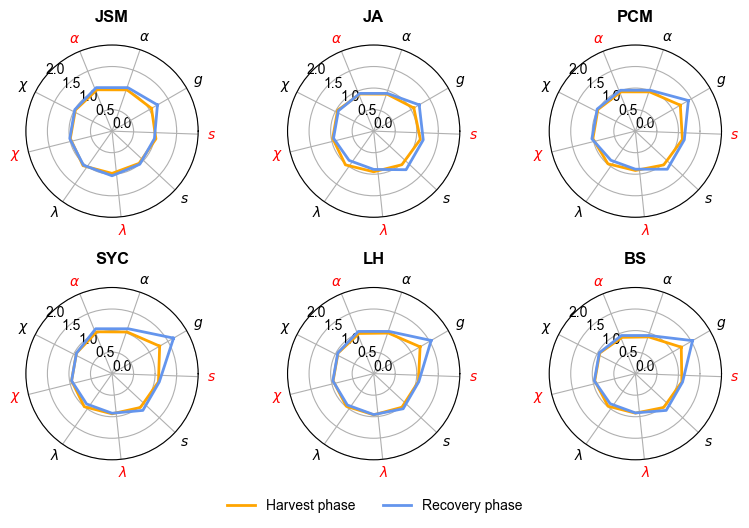

In [12]:
fig, ax = plt.subplots(2, 3, figsize = (8,5))

for i, axs in enumerate(ax.flat):
    axs.set_xticklabels([])

for SPE_idx, SPE in enumerate((Fish_har_traits_list, Fish_rec_traits_list)):
    for spe_idx, spe in enumerate(SPE):
        spe_finput = spe['Finput'].unique()
        spe_cvg = spe['CVg'].unique()
        spe_trait = pd.DataFrame()
        for finput_idx, finput in enumerate(spe_finput):
            for cvg_idx, cvg in enumerate(spe_cvg):
                spe_tmp_all = spe[(spe['Finput']==finput) & (spe['CVg']==cvg)]
                spe_trait_tmp_all = pd.DataFrame(spe_tmp_all.loc[:, ['growth', 'Finput', 'CVg']].mean()).T
                if SPE_idx == 0:
                    spe_tmp_b = spe[(spe['Finput']==finput) & (spe['CVg']==cvg) & (150-spe.Ybirth<=spe.age_mat)]
                    spe_tmp_a = spe[(spe['Finput']==finput) & (spe['CVg']==cvg) & (150-spe.Ybirth>spe.age_mat)]
                else:
                    spe_tmp_b = spe[(spe['Finput']==finput) & (spe['CVg']==cvg) & (300-spe.Ybirth<=spe.age_mat)]
                    spe_tmp_a = spe[(spe['Finput']==finput) & (spe['CVg']==cvg) & (300-spe.Ybirth>spe.age_mat)]                    
                spe_trait_tmp_b = pd.DataFrame(spe_tmp_b.loc[:, ['Gi', 'Gd','Pi', 'Ps']].mean()).T
                spe_trait_tmp_b.columns = ['Gi_b', 'Gd_b', 'Pi_b', 'Ps_b']
                spe_trait_tmp_a = pd.DataFrame(spe_tmp_a.loc[:, ['Gi','Gd', 'Pi', 'Ps']].mean()).T
                spe_trait_tmp_a.columns = ['Gi_a','Gd_a', 'Pi_a', 'Ps_a']
                spe_trait_tmp = pd.concat([spe_trait_tmp_all, spe_trait_tmp_b, spe_trait_tmp_a], axis=1)
                spe_trait_tmp = spe_trait_tmp.reindex(columns=['growth','Gi_b','Gi_a','Gd_b','Gd_a',
                                                               'Pi_a','Pi_b','Ps_a','Ps_b','Finput','CVg'])
                spe_trait = pd.concat([spe_trait, spe_trait_tmp], axis=0)
                
        f05 = np.array(spe_trait.iloc[3,:-2]/spe_trait.iloc[2,:-2])
        f05 = np.append(f05, f05[0])          

        labels = spe_trait.columns[:-2]
        labels_tex= [r'$g$', r'$\alpha$', r'$\alpha$', r'$\chi$', r'$\chi$', r'$\lambda$', r'$\lambda$', r'$s$', r'$s$']
        theta = np.linspace(0+1/6*np.pi, 2 * np.pi+1/6*np.pi, len(f05))
        
        plt.subplot(2, 3, spe_idx+1, polar=True)
        lines, labels = plt.thetagrids(range(0+30, 360+30, int(360/len(labels))+1), (labels_tex))
        if SPE_idx == 0:
            plt.plot(theta, f05, lw=2, color='orange')
        else:
            plt.plot(theta, f05, lw=2, color='cornflowerblue')
        plt.rgrids(np.arange(0, 2.2, 0.5), angle=141)
        for i in np.arange(len(theta)-1)[::2][1:]:
            plt.gca().get_xticklabels()[i].set_color("red")
        plt.tick_params(labelsize=10)
        plt.tick_params(axis='x', pad=-1)   
        plt.title(fishname_list[spe_idx], fontweight='bold')
fig.legend(labels=('Harvest phase', 'Recovery phase'), loc='lower center', frameon=False,
           facecolor = sns.color_palette('BrBG')[3], framealpha=0.0, bbox_to_anchor=(0.5,-0.06), ncol=2) 
plt.tight_layout()

# plt.savefig('./figures/Figure_05.jpg', dpi=600, bbox_inches='tight')
plt.savefig('./figures/Figure_05.pdf')

## Figure 06

In [13]:
JSM_gra_pop = pd.read_csv('./data/MIHR_gradient/JSM_pop.csv')
JA_gra_pop = pd.read_csv('./data/MIHR_gradient/JA_pop.csv')
PCM_gra_pop = pd.read_csv('./data/MIHR_gradient/PCM_pop.csv')
SYC_gra_pop = pd.read_csv('./data/MIHR_gradient/SYC_pop.csv')
LH_gra_pop = pd.read_csv('./data/MIHR_gradient/LH_pop.csv')
BS_gra_pop = pd.read_csv('./data/MIHR_gradient/BS_pop.csv')
Fish_gra_pop_list = [JSM_gra_pop, JA_gra_pop, PCM_gra_pop, SYC_gra_pop, LH_gra_pop, BS_gra_pop]

JSM_gra_har_traits = pd.read_csv('./data/MIHR_gradient/JSM_har_traits.csv')
SYC_gra_har_traits = pd.read_csv('./data/MIHR_gradient/SYC_har_traits.csv')
JA_gra_har_traits = pd.read_csv('./data/MIHR_gradient/JA_har_traits.csv')
PCM_gra_har_traits = pd.read_csv('./data/MIHR_gradient/PCM_har_traits.csv')
LH_gra_har_traits = pd.read_csv('./data/MIHR_gradient/LH_har_traits.csv')
BS_gra_har_traits = pd.read_csv('./data/MIHR_gradient/BS_har_traits.csv')

JSM_gra_rec_traits = pd.read_csv('./data/MIHR_gradient/JSM_rec_traits.csv')
SYC_gra_rec_traits = pd.read_csv('./data/MIHR_gradient/SYC_rec_traits.csv')
JA_gra_rec_traits = pd.read_csv('./data/MIHR_gradient/JA_rec_traits.csv')
PCM_gra_rec_traits = pd.read_csv('./data/MIHR_gradient/PCM_rec_traits.csv')
LH_gra_rec_traits = pd.read_csv('./data/MIHR_gradient/LH_rec_traits.csv')
BS_gra_rec_traits = pd.read_csv('./data/MIHR_gradient/BS_rec_traits.csv')
Fish_gra_rec_traits_list = [JSM_gra_rec_traits, JA_gra_rec_traits, PCM_gra_rec_traits, 
                            SYC_gra_rec_traits, LH_gra_rec_traits, BS_gra_rec_traits]
Fish_gra_har_traits_list = [JSM_gra_har_traits, JA_gra_har_traits , PCM_gra_har_traits, 
                            SYC_gra_har_traits , LH_gra_har_traits , BS_gra_har_traits]

Age_ = np.array([10, 4, 8, 6, 7, 9])
Finput_color_list = ['r', 'g', 'b', 'k']

In [14]:
cmap_ = 'RdBu'
Lp50_evo = gradient_start2end(Fish_gra_pop_list, Vtrait='Lp50_pop', scenario='evo')
Lp50_evo_df = pd.DataFrame(np.matrix(Lp50_evo), index=['JSM', 'JA', 'PCM', 'SYC', 'LH', 'BS'],
                           columns=np.round(np.arange(0.2, 0.8, 0.05), 2).astype(str))
fecund_evo = gradient_start2end(Fish_gra_pop_list, Vtrait='fecund_pop', scenario='evo')
fecund_evo_df = pd.DataFrame(np.matrix(fecund_evo), index=['JSM', 'JA', 'PCM', 'SYC', 'LH', 'BS'],
                           columns=np.round(np.arange(0.2, 0.8, 0.05), 2).astype(str))
V = 'l'
grad_evo_end, grad_evo_half = gradient_half2end(Fish_gra_rec_traits_list, Fish_gra_har_traits_list, Vtrait=V, scenario='evo')
grad_evo_end_df = pd.DataFrame(np.matrix(grad_evo_end), index=['JSM', 'JA', 'PCM', 'SYC', 'LH', 'BS'], 
                           columns=np.round(np.arange(0.2, 0.8, 0.05), 2).astype(str))
grad_evo_half_df = pd.DataFrame(np.matrix(grad_evo_half), index=['JSM', 'JA', 'PCM', 'SYC', 'LH', 'BS'], 
                           columns=np.round(np.arange(0.2, 0.8, 0.05), 2).astype(str))
grad_nonevo_df_  = grad_evo_end_df/grad_evo_half_df

vmin = min(np.nanmin(Lp50_evo), np.nanmin(fecund_evo), np.nanmin(grad_nonevo_df_))
vmax = max(np.nanmax(Lp50_evo), np.nanmax(fecund_evo), np.nanmax(grad_nonevo_df_))

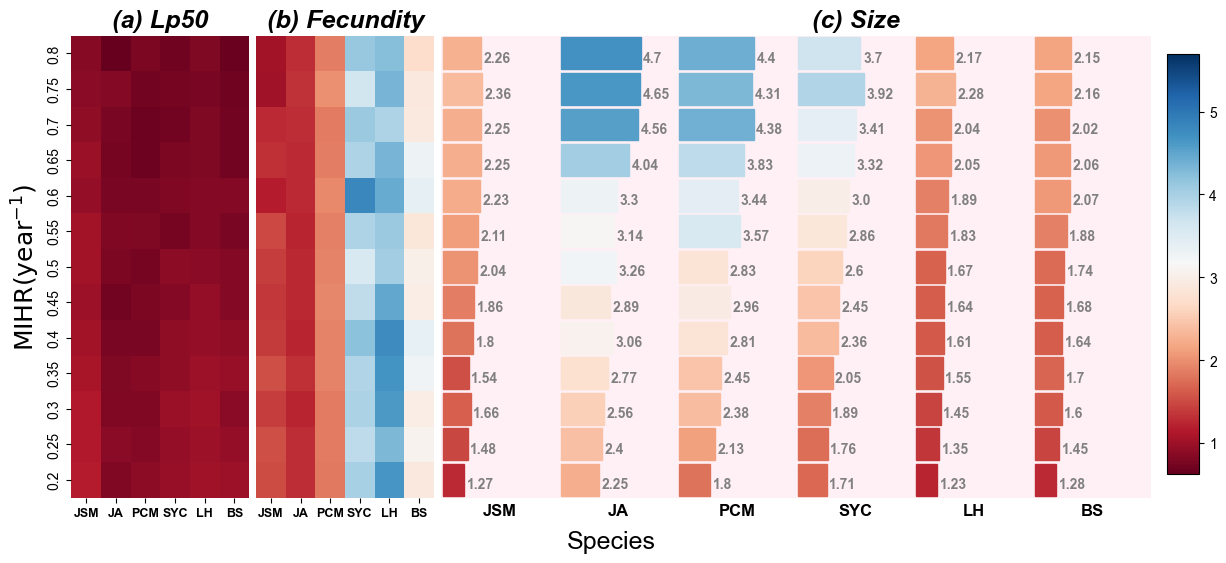

In [15]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(16, 6))
plt.subplots_adjust(wspace=0.02)
outer = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[0.75, 0.75, 3]) 
gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[0])
gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[1])
gs3 = gridspec.GridSpecFromSubplotSpec(1, 6, subplot_spec=outer[2], wspace=0)

for cell in gs1:
    ax0 = plt.subplot(cell)
    sns.heatmap(Lp50_evo_df.T, ax=ax0, cmap=cmap_, cbar=False,
                vmin=vmin, vmax=vmax, annot_kws={'size':8, 'weight':'bold'})
    ax0.invert_yaxis()
    ax0.set_xticklabels(['JSM', 'JA', 'PCM', 'SYC', 'LH', 'BS'], fontsize=9, fontweight='bold')
    ax0.set_ylabel(r'$\mathrm{MIHR (year^{-1})}$', fontsize=18)
    ax0.set_title('(a) Lp50', fontsize=18, fontweight='bold', fontstyle='italic')
for cell in gs2:
    ax1 = plt.subplot(cell)
    sns.heatmap(fecund_evo_df.T, ax=ax1, cmap=cmap_, cbar=False,
                vmin=vmin, vmax=vmax, annot_kws={'size':8, 'weight':'bold'})
    ax1.invert_yaxis()
    ax1.set_yticks([])
    ax1.set_xticklabels(['JSM', 'JA', 'PCM', 'SYC', 'LH', 'BS'], fontsize=9, fontweight='bold')
    ax1.set_xlabel('Species', fontsize=18)
    ax1.xaxis.set_label_coords(*(2.0, -0.07))
    ax1.set_title('(b) Fecundity', fontsize=18, fontweight='bold', fontstyle='italic')

gradbar = grad_nonevo_df_.T
gradbar['index'] = gradbar.index    
for idx, cell in enumerate(gs3):
    ax = plt.subplot(cell)
    spe_name = gradbar.columns[:-1][idx]
    ax.set_facecolor('lavenderblush')
    if spe_name == 'SYC':
        ax.set_title('(c) Size', fontsize=18, fontweight='bold', fontstyle='italic')
    bars = ax.barh(gradbar.index, gradbar[spe_name]-1, height=0.9, edgecolor='white')

    for i, bar in enumerate(bars):
        color =matplotlib.colormaps[cmap_]((gradbar.iloc[i][spe_name] -1 -vmin) / (vmax-vmin))
        bar.set_color(color)
   
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    ax.set_xlabel(spe_name, fontsize=12, fontweight='bold')
    ax.set_xlim(-0.1, 6.9)
    ax.set_ylim(0-0.5, 13-0.5)

    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    for i in ax.patches:
        ax.text(i.get_width()+0.15, i.get_y()+0.2, str(round((i.get_width()), 2)),
                 fontsize=10, fontweight='bold', color='grey')
        
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.15, 0.02, 0.7])
cb = fig.colorbar(ax0.collections[0], cax=cbar_ax)

# plt.savefig('./figure/figure_06.jpg', dpi=600, bbox_inches='tight')
plt.savefig('./figures/Figure_06.pdf')